# Wholesale customers Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as snb
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import xgboost
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from xgboost import cv
from sklearn.preprocessing import  StandardScaler , MinMaxScaler
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA


from google.colab import files
uploaded = files.upload()

Saving Wholesale customers data.csv to Wholesale customers data.csv


## Data Analysis

In [4]:
df = pd.read_csv('Wholesale customers data.csv')

In [5]:
df.shape

(440, 8)

In [6]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [8]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [10]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [11]:
df.Region.value_counts()

Region
3    316
1     77
2     47
Name: count, dtype: int64

In [12]:
df.Channel.value_counts()

Channel
1    298
2    142
Name: count, dtype: int64

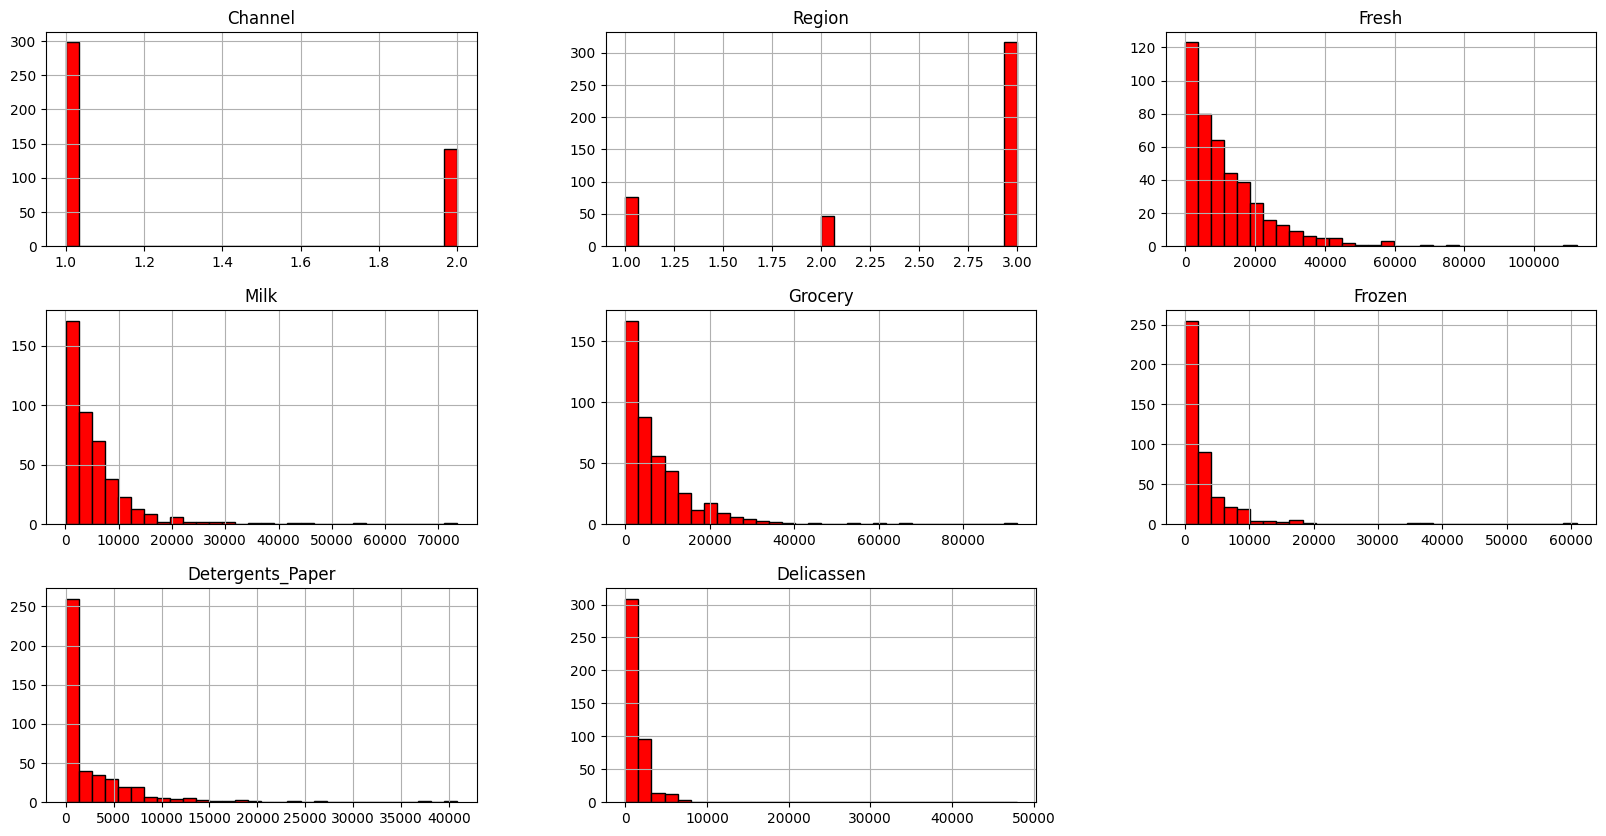

In [14]:
df.hist(figsize=(20,10),bins=30, color='red', edgecolor='black')
plt.show()

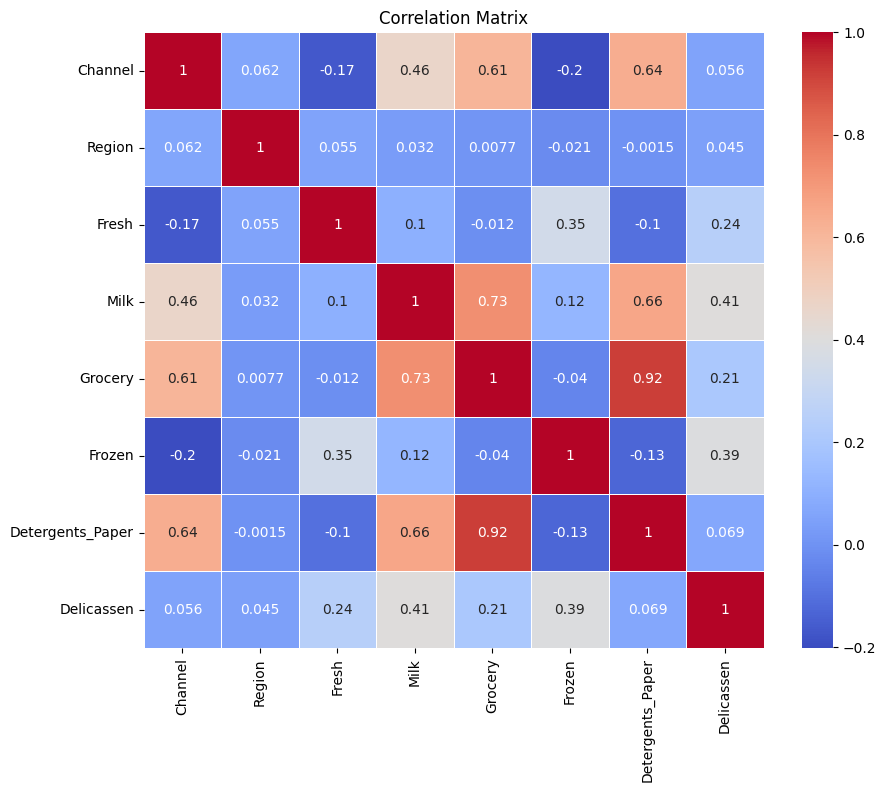

In [15]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
snb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Grouped by Region:
         Channel         Fresh         Milk      Grocery       Frozen  \
Region                                                                  
1       1.233766  11101.727273  5486.415584  7403.077922  3000.337662   
2       1.404255   9887.680851  5088.170213  9218.595745  4045.361702   
3       1.332278  12533.471519  5977.085443  7896.363924  2944.594937   

        Detergents_Paper   Delicassen  
Region                                 
1            2651.116883  1354.896104  
2            3687.468085  1159.702128  
3            2817.753165  1620.601266  

Grouped by Channel:
           Region         Fresh          Milk       Grocery       Frozen  \
Channel                                                                    
1        2.510067  13475.560403   3451.724832   3962.137584  3748.251678   
2        2.612676   8904.323944  10716.500000  16322.852113  1652.612676   

         Detergents_Paper   Delicassen  
Channel                                 
1      

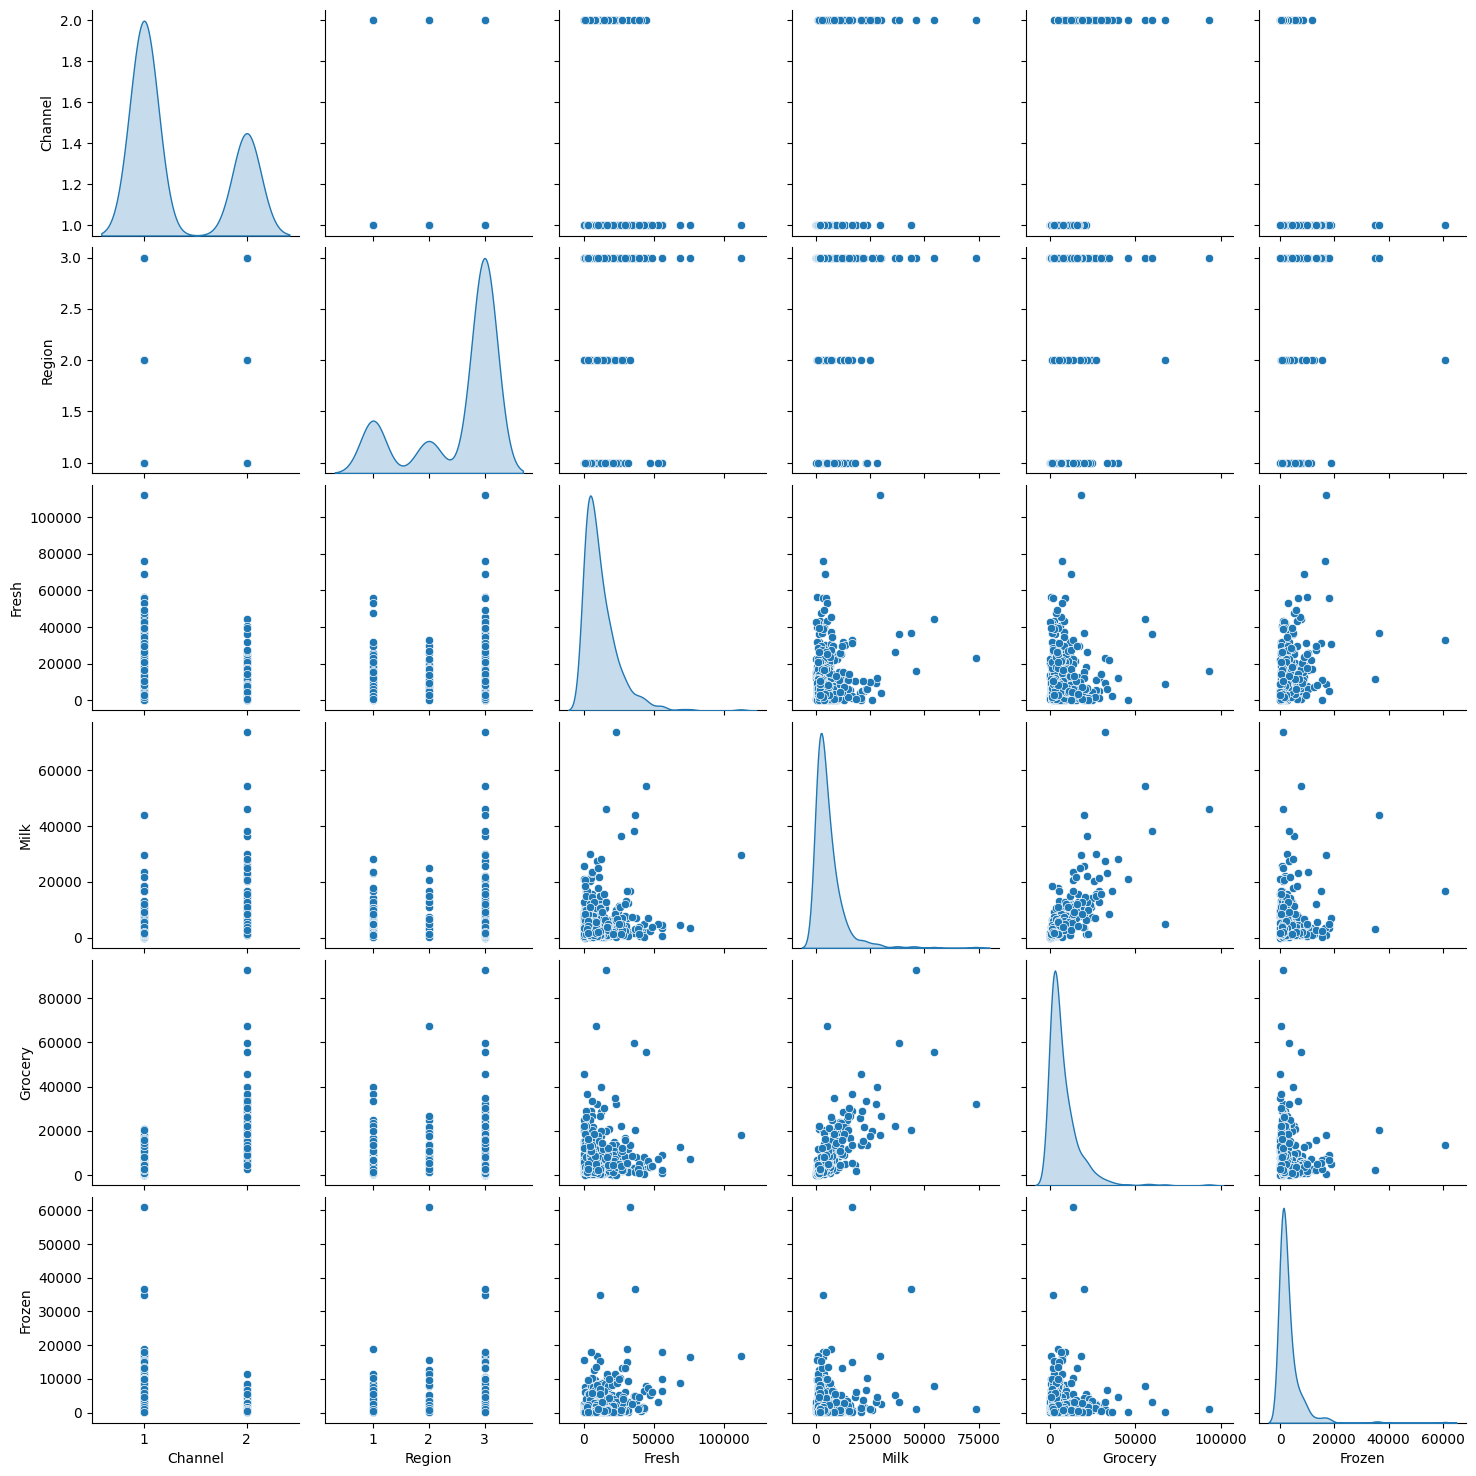

In [16]:
# Grouped Analysis
grouped_by_region = df.groupby('Region').mean()
grouped_by_channel = df.groupby('Channel').mean()
print("Grouped by Region:")
print(grouped_by_region)
print("\nGrouped by Channel:")
print(grouped_by_channel)

# Data Visualization (Scatter Plots)
snb.pairplot(df, vars=df.columns[:6], diag_kind='kde')
plt.show()

In [17]:
pd.DataFrame(df).describe().head(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937


## Feature Scaling to Normalize the data

### Implementing MinMax scaling

In [18]:
scaler_MinMax = MinMaxScaler().fit_transform(df)
scaler_MinMax[:5]

array([[1.        , 1.        , 0.11294004, 0.13072723, 0.08146416,
        0.0031063 , 0.0654272 , 0.02784731],
       [1.        , 1.        , 0.06289903, 0.13282409, 0.10309667,
        0.02854842, 0.08058985, 0.03698373],
       [1.        , 1.        , 0.05662161, 0.11918086, 0.08278992,
        0.03911643, 0.08605232, 0.16355861],
       [0.        , 1.        , 0.11825445, 0.01553586, 0.04546385,
        0.10484189, 0.01234568, 0.03723404],
       [1.        , 1.        , 0.20162642, 0.07291369, 0.07755155,
        0.063934  , 0.04345483, 0.10809345]])

In [19]:
# Convert the scaled data back to a DataFrame with the same columns
scaled_df = pd.DataFrame(scaler_MinMax, columns=df.columns)

# Now, scaled_df contains the scaled data in the same structure as df
print(scaled_df.head())

   Channel  Region     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
0      1.0     1.0  0.112940  0.130727  0.081464  0.003106          0.065427   
1      1.0     1.0  0.062899  0.132824  0.103097  0.028548          0.080590   
2      1.0     1.0  0.056622  0.119181  0.082790  0.039116          0.086052   
3      0.0     1.0  0.118254  0.015536  0.045464  0.104842          0.012346   
4      1.0     1.0  0.201626  0.072914  0.077552  0.063934          0.043455   

   Delicassen  
0    0.027847  
1    0.036984  
2    0.163559  
3    0.037234  
4    0.108093  


In [20]:
pd.DataFrame(scaler_MinMax).describe().head(3)

,0,1,2,3,4,5,6,7
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.00000,440.000000
mean,0.322727,0.771591,0.106977,0.078173,0.085671,0.050078,0.07051,0.031745
std,0.468052,0.387136,0.112774,0.100491,0.102430,0.079789,0.11679,0.058826


### Implementing StandardScaler

In [21]:
scaler_Standard = StandardScaler().fit_transform(df)
scaler_Standard[:5]

array([[ 1.44865163,  0.59066829,  0.05293319,  0.52356777, -0.04111489,
        -0.58936716, -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197,  0.54445767,  0.17031835,
        -0.27013618,  0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926,  0.40853771, -0.0281571 ,
        -0.13753572,  0.13323164,  2.24329255],
       [-0.69029709,  0.59066829,  0.10011141, -0.62401993, -0.3929769 ,
         0.6871443 , -0.49858822,  0.09341105],
       [ 1.44865163,  0.59066829,  0.84023948, -0.05239645, -0.07935618,
         0.17385884, -0.23191782,  1.29934689]])

In [22]:
pd.DataFrame(scaler_Standard).describe().head(3)

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00


In [23]:
# Convert the scaled data back to a DataFrame with the same columns
scaled_Standard_df = pd.DataFrame(scaler_Standard, columns=df.columns)

# Now, scaled_df contains the scaled data in the same structure as df
print(scaled_Standard_df.head())

    Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  1.448652  0.590668  0.052933  0.523568 -0.041115 -0.589367   
1  1.448652  0.590668 -0.391302  0.544458  0.170318 -0.270136   
2  1.448652  0.590668 -0.447029  0.408538 -0.028157 -0.137536   
3 -0.690297  0.590668  0.100111 -0.624020 -0.392977  0.687144   
4  1.448652  0.590668  0.840239 -0.052396 -0.079356  0.173859   

   Detergents_Paper  Delicassen  
0         -0.043569   -0.066339  
1          0.086407    0.089151  
2          0.133232    2.243293  
3         -0.498588    0.093411  
4         -0.231918    1.299347  


### ploting kde plots for Standard scaled values and Min Max scaled values

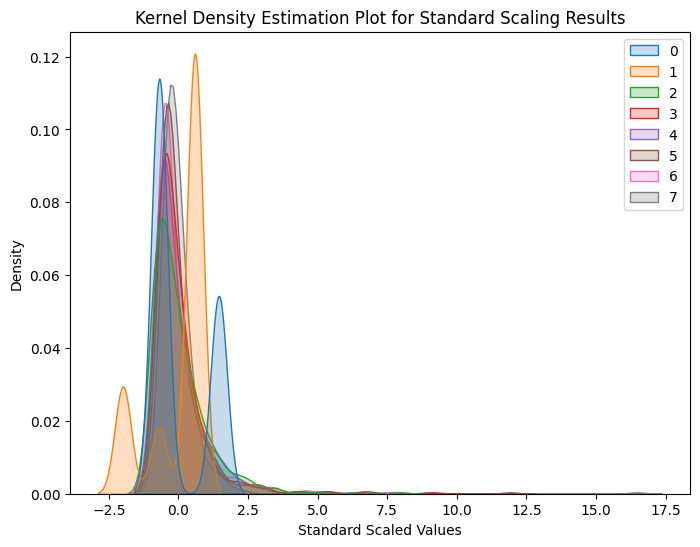

In [25]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Use Seaborn to create a KDE plot
snb.kdeplot(data=scaler_Standard, fill=True, color='b', ax=ax)

# Add labels and a title
ax.set_xlabel("Standard Scaled Values")
ax.set_ylabel("Density")
ax.set_title("Kernel Density Estimation Plot for Standard Scaling Results")

# Display the plot
plt.show()

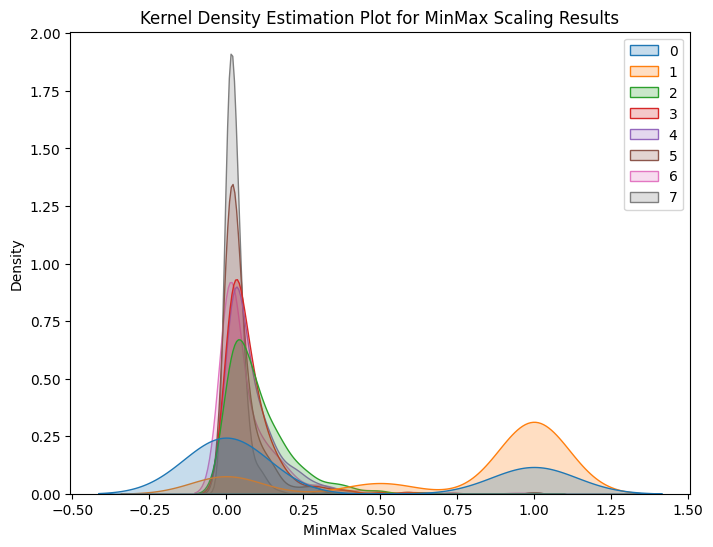

In [27]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Use Seaborn to create a KDE plot
snb.kdeplot(data=scaler_MinMax, fill=True, color='b', ax=ax)

# Add labels and a title
ax.set_xlabel("MinMax Scaled Values")
ax.set_ylabel("Density")
ax.set_title("Kernel Density Estimation Plot for MinMax Scaling Results")

# Display the plot
plt.show()

#### Using MinMax scaler since the MinMax scaler scales continuous features to a specific range.

In [28]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.2.2.


In [29]:
# Define your features (X) and target (y)
X = scaled_df.drop(columns=['Channel'])
y = scaled_df['Channel']

## Performing RFECV

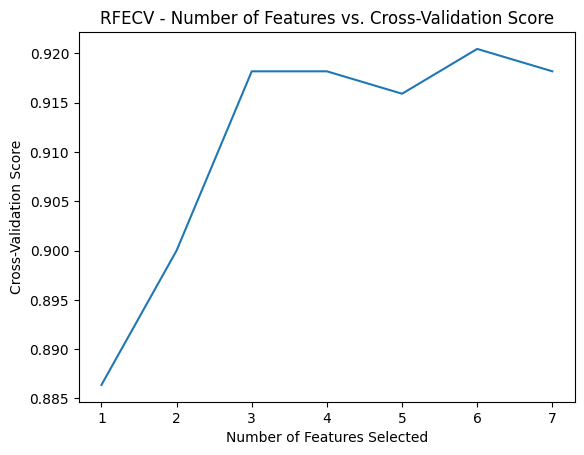

Optimal number of features: 6
Number of steps in RFECV: 7


In [30]:
# RandomForestClassifier as estimator
estimator = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=7)

# Create RFECV with StratifiedKFold for cross-validation
rfecv = RFECV(estimator, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X, y)

# Plot the number of features vs. cross-validation score
plt.figure()
plt.title('RFECV - Number of Features vs. Cross-Validation Score')
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross-Validation Score')
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

# The optimal number of features can be obtained using rfecv.n_features_
print(f"Optimal number of features: {rfecv.n_features_}")

# Get the mean test scores during the feature selection process
mean_test_scores = rfecv.cv_results_['mean_test_score']

print("Number of steps in RFECV:", len(mean_test_scores))


## Elbow method for KMeans Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

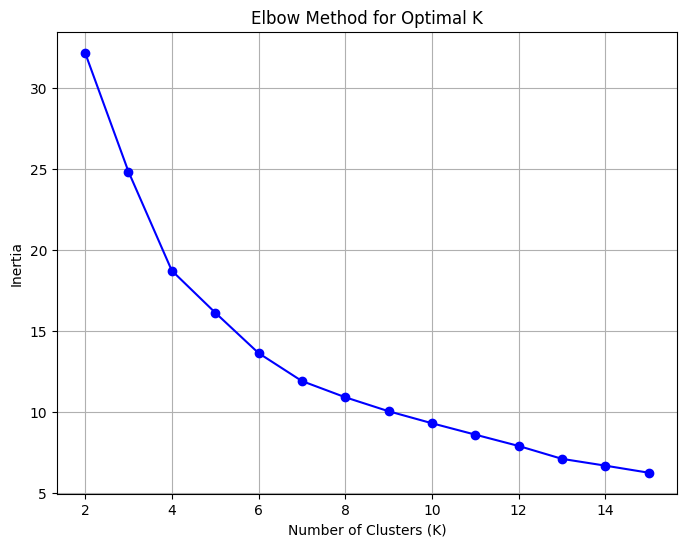

The optimal number of clusters (K) is: 3


In [31]:
# Define the range of K values to test
K_values = range(2, 16)

# Initialize an empty list to store the inertia (within-cluster sum of squares) values
inertia = []

# Iterate over the K values and fit KMeans for each K
for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    # Append the inertia value to the list
    inertia.append(kmeans.inertia_)

# Plot the elbow method to identify the optimal K
plt.figure(figsize=(8, 6))
plt.plot(K_values, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

# Identify the optimal K using the "elbow" method
diff = np.diff(inertia)
k_optimal = K_values[np.argmin(diff) + 1]

print(f"The optimal number of clusters (K) is: {k_optimal}")

# Perform DBSCAN Clustering

In [40]:
from sklearn.cluster import DBSCAN

In [42]:
data=pd.read_csv('Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [43]:
data.drop(['Channel','Region'],axis=1,inplace=True)
data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [44]:
# Normalize heterogenous numerical data using standard scalar fit transform to dataset
data_norm=StandardScaler().fit_transform(data)
data_norm

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [45]:
# DBSCAN Clustering
dbscan=DBSCAN(eps=1,min_samples=6)
dbscan.fit(data_norm)

DBSCAN(eps=1, min_samples=6)

In [46]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0,
        0,  0,  0,  0,  0

In [47]:
# Making clusters column (optional step)
clusters=pd.DataFrame(dbscan.labels_,columns=['clusters'])
clusters

,clusters
0,0
1,0
2,-1
3,0
4,0
...,...
435,-1
436,0
437,-1
438,0


In [48]:
# Adding clusters to dataset
data['Clusters']=dbscan.labels_
data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Clusters
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,-1
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,-1
436,39228,1431,764,4510,93,2346,0
437,14531,15488,30243,437,14841,1867,-1
438,10290,1981,2232,1038,168,2125,0


## Implementing PCA

In [32]:
pca = PCA(n_components=7)  # Specify the number of components as None to retain all components
X_pca = pca.fit_transform(X)

In [33]:
X.shape

(440, 7)

In [35]:
X_pca.shape

(440, 7)

### Variance is explained by first 2 components and by first 4 components

Explained variance by the first 2 components:
[0.23363946 0.14853705]
Explained variance ratio by the first 2 components:
[0.54880788 0.3489064 ]

Explained variance by the first 4 components:
[0.23363946 0.14853705 0.01863653 0.01273479]
Explained variance ratio by the first 4 components:
[0.54880788 0.3489064  0.04377632 0.02991341]


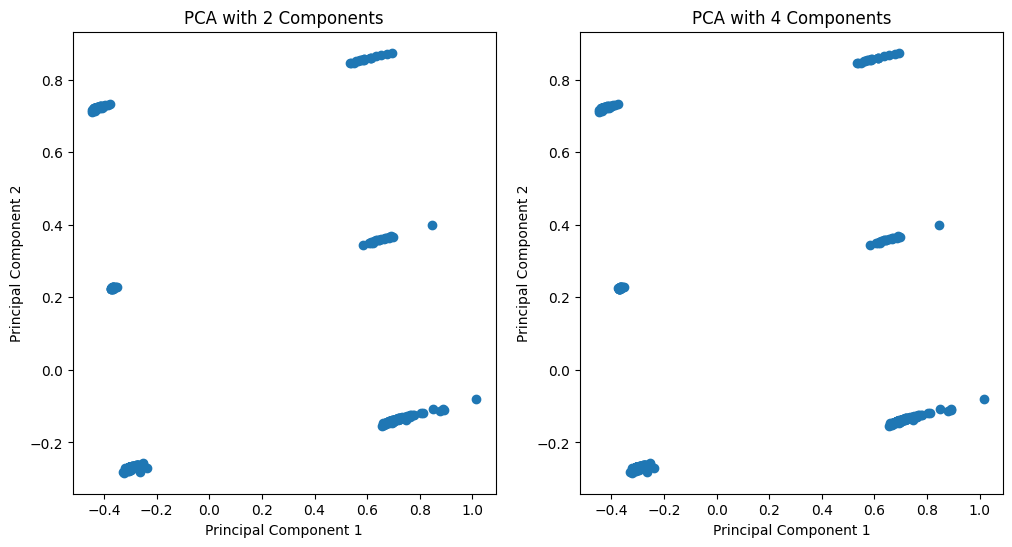

In [36]:
#  PCA with 2 components
pca_2c_model = PCA(n_components=2)
x_pca_2c = pca_2c_model.fit_transform(scaled_df)

# Explained variance for 2 components
explained_variance_2c = pca_2c_model.explained_variance_
explained_variance_ratio_2c = pca_2c_model.explained_variance_ratio_

print("Explained variance by the first 2 components:")
print(explained_variance_2c)
print("Explained variance ratio by the first 2 components:")
print(explained_variance_ratio_2c)

# PCA with 4 components
pca_4c_model = PCA(n_components=4)
x_pca_4c = pca_4c_model.fit_transform(scaled_df)

# Explained variance for 4 components
explained_variance_4c = pca_4c_model.explained_variance_
explained_variance_ratio_4c = pca_4c_model.explained_variance_ratio_

print("\nExplained variance by the first 4 components:")
print(explained_variance_4c)
print("Explained variance ratio by the first 4 components:")
print(explained_variance_ratio_4c)

# Visualize the clusters in the data
# scatter plot for the first two principal components
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(x_pca_2c[:, 0], x_pca_2c[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA with 2 Components")

plt.subplot(1, 2, 2)
plt.scatter(x_pca_4c[:, 0], x_pca_4c[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA with 4 Components")

plt.show()

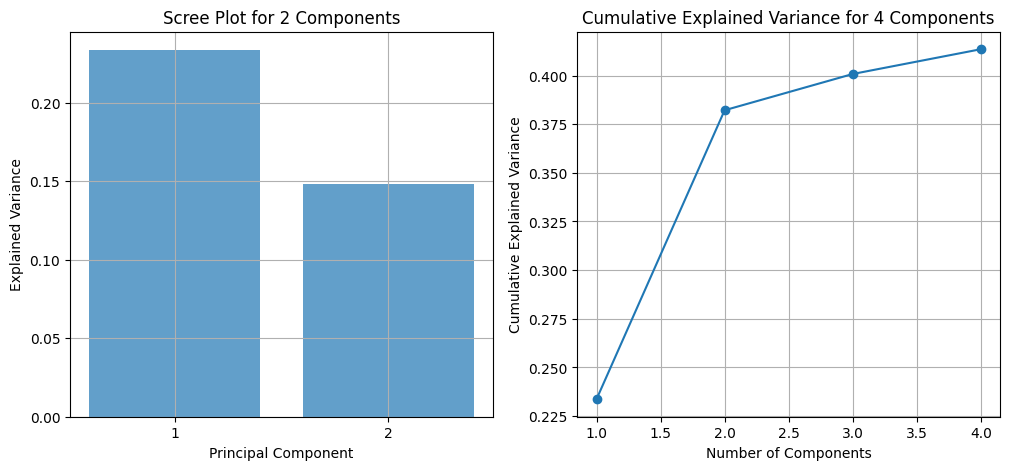

In [37]:
# scree plot for the explained variance of the first 2 components
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance_2c) + 1), explained_variance_2c, alpha=0.7, align='center')
plt.xticks(range(1, len(explained_variance_2c) + 1))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Scree Plot for 2 Components')
plt.grid()

# cumulative explained variance plot for the first 4 components
cumulative_explained_variance_4c = np.cumsum(explained_variance_4c)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_explained_variance_4c) + 1), cumulative_explained_variance_4c, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance for 4 Components')
plt.grid()

plt.show()

#### When the explained variance for two principal components is notably higher than for four components, it suggests that the bulk of the variability in your data can be effectively encapsulated by just two components. This highlights a fundamental aspect of principal component analysis (PCA).

####Typically, the initial principal components capture the most significant patterns or structures in the data, while subsequent components gradually capture less variance, potentially representing noise or less pertinent variations. Consequently, by reducing the dimensionality of the data and retaining only those principal components that explain the majority of the variance, you simplify the dataset without sacrificing crucial information. This approach enables you to focus on the most essential aspects of the data while disregarding redundant or less informative features.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


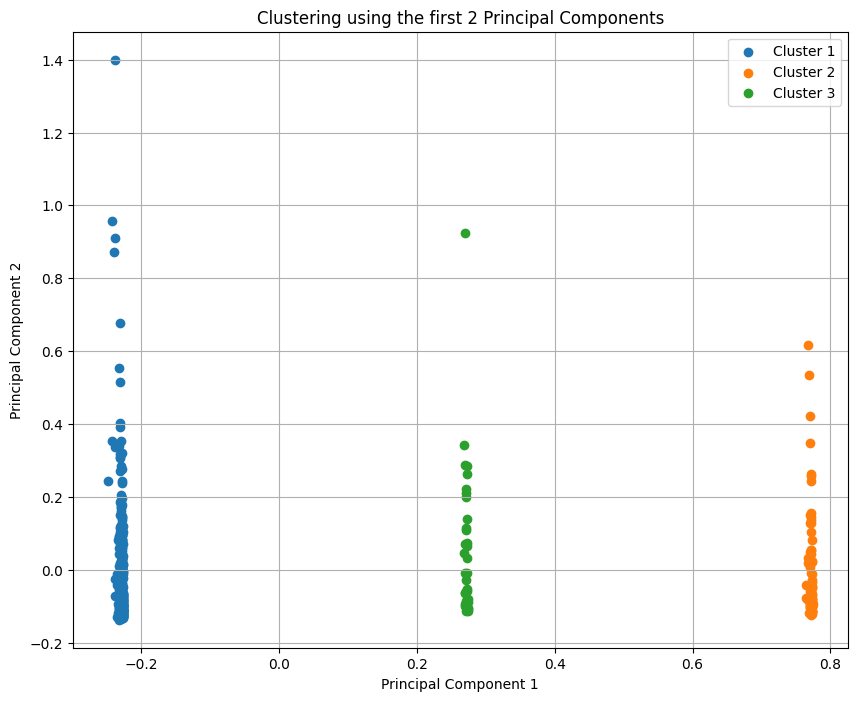

In [38]:
# Visualize the clusters in the data
optimal_K = 3
kmeans = KMeans(n_clusters=optimal_K, random_state=42)
kmeans.fit(X_pca)

# Visualize the clusters using the first two principal components
plt.figure(figsize=(10, 8))
for i in range(optimal_K):
    plt.scatter(X_pca[kmeans.labels_ == i, 0], X_pca[kmeans.labels_ == i, 1], label=f'Cluster {i + 1}')
plt.title('Clustering using the first 2 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

<li>The clusters appear to be well separated, suggesting that the clustering algorithm was able to identify distinct groups in the data.The clear separation of clusters indicates that the PCA and clustering were successful in grouping similar data points together.</li>